# Calculation demonstration from script

This Notebook tests installed iprPy for running calculations

In [1]:
import matplotlib.pyplot as plt

import iprPy

## Load iprPy and calculation

In [2]:
calc = iprPy.load_calculation('diatom_scan')

## Build input script

### View the calculation's input script

In [3]:
print(calc.template)

# Input script for calc_diatom_scan.py

# Calculation metadata
branch                          <branch>

# Command lines for LAMMPS and MPI
lammps_command                  <lammps_command>
mpi_command                     <mpi_command>

# Potential definition and directory containing associated files
potential_file                  <potential_file>
potential_dir                   <potential_dir>

# Units for input/output values
length_unit                     <length_unit>
pressure_unit                   <pressure_unit>
energy_unit                     <energy_unit>
force_unit                      <force_unit>

# Run parameters
symbols                         <symbols>
minimum_r                       <minimum_r>
maximum_r                       <maximum_r>
number_of_steps_r               <number_of_steps_r>



### Create dictionary with key values

In [4]:
potential_name = '1986--Foiles-S-M--Cu--LAMMPS--ipr1'

In [5]:
# Initialize input_dict with empty fields    
input_dict = {}
input_dict['branch'] = ''
input_dict['lammps_command'] = 'lmp_mpi'
input_dict['mpi_command'] = ''
input_dict['potential_file'] = f'local_db/potential_LAMMPS/{potential_name}.json'
input_dict['potential_dir'] = f'local_db/potential_LAMMPS/{potential_name}'
input_dict['length_unit'] = ''
input_dict['pressure_unit'] = ''
input_dict['energy_unit'] = ''
input_dict['force_unit'] = ''
input_dict['symbols'] = 'Cu'
input_dict['minimum_r'] = ''
input_dict['maximum_r'] = ''
input_dict['number_of_steps_r'] = ''

### Build input script by filling in values

In [6]:
input_file = f'calc.in'
input_script = iprPy.tools.filltemplate(calc.template, input_dict, '<', '>')
print(input_script)
with open(input_file, 'w') as f:
    f.write(input_script)

# Input script for calc_diatom_scan.py

# Calculation metadata
branch                          

# Command lines for LAMMPS and MPI
lammps_command                  lmp_mpi
mpi_command                     

# Potential definition and directory containing associated files
potential_file                  local_db/potential_LAMMPS/1986--Foiles-S-M--Cu--LAMMPS--ipr1.json
potential_dir                   local_db/potential_LAMMPS/1986--Foiles-S-M--Cu--LAMMPS--ipr1

# Units for input/output values
length_unit                     
pressure_unit                   
energy_unit                     
force_unit                      

# Run parameters
symbols                         Cu
minimum_r                       
maximum_r                       
number_of_steps_r               



## Run calculation

### calc.main reads input script and runs the calculation

In [7]:
calc.main('calc.in')

### Calculation results are saved to results.json

In [8]:
with open('results.json') as f:
    print(f.read())

{
    "calculation-diatom-scan": {
        "key": "7ae0d785-f04c-493d-a065-4b05a67247a9", 
        "calculation": {
            "iprPy-version": "0.10.1", 
            "atomman-version": "1.3.3", 
            "LAMMPS-version": "3 Mar 2020", 
            "script": "calc_diatom_scan", 
            "branch": "main", 
            "run-parameter": {
                "minimum_r": {
                    "value": 0.02, 
                    "unit": "angstrom"
                }, 
                "maximum_r": {
                    "value": 6.0, 
                    "unit": "angstrom"
                }, 
                "number_of_steps_r": 300
            }
        }, 
        "potential-LAMMPS": {
            "key": "380d3b47-51e9-4590-8a59-8313dd8fb018", 
            "id": "1986--Foiles-S-M--Cu--LAMMPS--ipr1", 
            "potential": {
                "key": "7991d330-58cd-43ac-bba9-ff6a58dcf617", 
                "id": "1986--Foiles-S-M-Baskes-M-I-Daw-M-S--Cu"
            }
        }, 
       

}


### There are also built-in "Record" objects that interpret the results for each calculation

In [9]:
record = iprPy.load_record(calc.record_style, content='results.json')
record_dict = record.todict()
record_dict

{'key': '7ae0d785-f04c-493d-a065-4b05a67247a9',
 'iprPy_version': '0.10.1',
 'atomman_version': '1.3.3',
 'LAMMPS_version': '3 Mar 2020',
 'script': 'calc_diatom_scan',
 'branch': 'main',
 'status': 'finished',
 'error': nan,
 'minimum_r': 0.02,
 'maximum_r': 6.0,
 'number_of_steps_r': 300,
 'potential_LAMMPS_key': '380d3b47-51e9-4590-8a59-8313dd8fb018',
 'potential_LAMMPS_id': '1986--Foiles-S-M--Cu--LAMMPS--ipr1',
 'potential_key': '7991d330-58cd-43ac-bba9-ff6a58dcf617',
 'potential_id': '1986--Foiles-S-M-Baskes-M-I-Daw-M-S--Cu',
 'symbols': ['Cu'],
 'diatom_plot':         r        energy
 0    0.02  81100.503002
 1    0.04  37856.802610
 2    0.06  23560.659751
 3    0.08  16490.333379
 4    0.10  12294.482483
 ..    ...           ...
 295  5.92      0.000000
 296  5.94      0.000000
 297  5.96      0.000000
 298  5.98      0.000000
 299  6.00      0.000000
 
 [300 rows x 2 columns]}

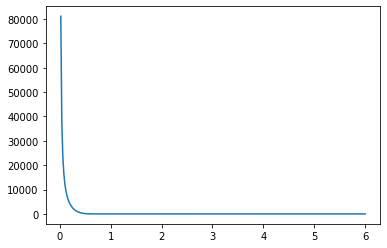

In [10]:
plt.plot(record_dict['diatom_plot'].r, record_dict['diatom_plot'].energy)